In [2]:
%pip install pandas
%pip install sklearn 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

Import packages

In [3]:
''' Discard all warnings in Jupyter Notebook'''
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
dftrain = pd.read_csv("Data/FINAL_CSV/train70_reduced.csv") 
dftrain_roc = dftrain
dftrain.head()

,tcp.flags,tcp.time_delta,tcp.len,mqtt.conack.flags,mqtt.conack.flags.reserved,mqtt.conack.flags.sp,mqtt.conack.val,mqtt.conflag.cleansess,mqtt.conflag.passwd,mqtt.conflag.qos,...,mqtt.qos,mqtt.retain,mqtt.sub.qos,mqtt.suback.qos,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len,target
0,0x00000018,0.998867,10,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
1,0x00000010,0.000067,1460,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
2,0x00000010,0.000058,1460,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
3,0x00000018,0.000227,10,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
4,0x00000018,0.000236,16,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos


In [6]:
dftest = pd.read_csv("Data/FINAL_CSV/test30_reduced.csv")
dftest_roc = dftest
dftest.head()

,tcp.flags,tcp.time_delta,tcp.len,mqtt.conack.flags,mqtt.conack.flags.reserved,mqtt.conack.flags.sp,mqtt.conack.val,mqtt.conflag.cleansess,mqtt.conflag.passwd,mqtt.conflag.qos,...,mqtt.qos,mqtt.retain,mqtt.sub.qos,mqtt.suback.qos,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len,target
0,0x00000014,0.029854,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malformed
1,0x00000018,0.000001,51,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
2,0x00000018,0.999820,13,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
3,0x00000012,0.007949,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malformed
4,0x00000010,0.000121,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos


In [7]:
encoder = LabelEncoder()
dftrain['target'] = encoder.fit_transform(dftrain['target'])
encoder.classes_

array(['bruteforce', 'ddos', 'flood', 'legitimate', 'malformed',
       'slowite'], dtype=object)

In [8]:
for column in dftrain.columns:
    if dftrain[column].dtype == type(object):
        labelencoder = LabelEncoder()
        dftrain[column] = labelencoder.fit_transform(dftrain[column])

X_train = dftrain.drop("target",axis = 'columns')
y_train = dftrain["target"]

In [9]:
for column in dftest.columns:
    if dftest[column].dtype == type(object):
        labelencoder = LabelEncoder()
        dftest[column] = labelencoder.fit_transform(dftest[column])

X_test = dftest.drop("target",axis = 'columns')
y_test = dftest["target"]

In [10]:
# # Lista przechowująca różne wartości dla liczby sąsiadów
# neighbors = np.arange(1, 100)

# # Lista przechowująca wyniki dokładności dla każdej wartości liczby sąsiadów
# accuracies = []

# # Pętla po różnych wartościach dla liczby sąsiadów
# for k in neighbors:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train, y_train)
#     y_pred = knn.predict(X_test)
#     accuracy = np.mean(y_pred == y_test)
#     accuracies.append(accuracy)

# # Wizualizacja dokładności w zależności od liczby sąsiadów
# plt.figure(figsize=(10, 6))
# plt.plot(neighbors, accuracies, marker='o')
# plt.title('Accuracy vs Number of Neighbors')
# plt.xlabel('Number of Neighbors (K)')
# plt.ylabel('Accuracy')
# plt.xticks(neighbors)
# plt.grid(True)
# plt.show()

In [12]:
from sklearn.model_selection import cross_val_score

k_values = list(range(1,100))
mean_accuracy = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mean_accuracy.append(np.mean(y_pred == y_test))
    print(k, mean_accuracy[k-1])


1 0.7448786383321583
2 0.7599254708429852
3 0.764548292879444
4 0.7465001510726156
5 0.7531977036962433
6 0.7481518783361869
7 0.8419478295900896
8 0.836640145029711
9 0.8444455635008561
10 0.8455937153791923
11 0.845603786886897
12 0.845775002517877
13 0.846077147749018
14 0.8458857891026287
15 0.8459260751334475
16 0.8438916305770974
17 0.8462785779031121
18 0.846318863933931
19 0.8462181488568838
20 0.8464800080572061
21 0.8465706516265485
22 0.8465706516265485
23 0.8466109376573673
24 0.8468022963037567
25 0.8465404371034344
26 0.8464699365495014
27 0.8469130828885084
28 0.8470137979655554
29 0.8471547990734213
30 0.8472152281196496
31 0.8471346560580119
32 0.8475274448584953
33 0.8467720817806426
34 0.8470137979655554
35 0.8469332259039178
36 0.8471547990734213
37 0.8470440124886696
38 0.8472152281196496
39 0.8469432974116226
40 0.8470842985194884
41 0.8468123678114614
42 0.8470540839963743
43 0.846963440427032
44 0.8470339409809649
45 0.8469835834424413
46 0.8470943700271931
47 0

In [ ]:
# plot TODO:

The optima number of neighbors is k=32


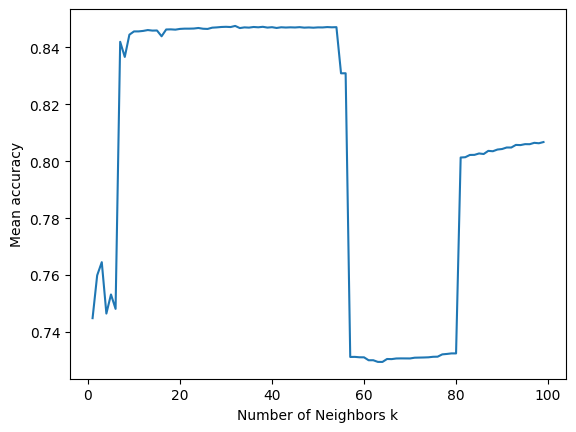

In [13]:
optimal_k = k_values[np.argmax(mean_accuracy)]
print(f"The optima number of neighbors is k={optimal_k}")
plt.plot([x for x in range(1,100)], mean_accuracy)
plt.xlabel("Number of Neighbors k")
plt.ylabel("Mean accuracy")
plt.show()

In [ ]:
# plt.figure(figsize=(10,6))
# plt.plot(range(1,20),error_rate,color="green",linestyle="dashed",marker="o")
# plt.xlabel("K")
# plt.ylabel("Error Rate")
# plt.title("Error Rate vs K")

In [14]:
knn = KNeighborsClassifier(n_neighbors=optimal_k, weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=32, weights='distance')

In [15]:
y_pred = knn.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)

y_test_labels = encoder.inverse_transform(y_test)
y_pred_labels = encoder.inverse_transform(y_pred)

clf_report = classification_report(y_test_labels, y_pred_labels, labels=encoder.classes_)
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels, labels=encoder.classes_)

print(f'Dane oryginalne)  Accuracy: {accuracy:.4f}')
print()
print(f"Classification Report:\n{clf_report}")
print(f"Confusion Matrix:\n{conf_matrix}")
print("#"*150)

Dane oryginalne)  Accuracy: 0.8460

Classification Report:
              precision    recall  f1-score   support

  bruteforce       0.73      0.79      0.76      4351
        ddos       0.79      0.91      0.84     39077
       flood       0.97      0.45      0.61       184
  legitimate       0.91      0.82      0.86     49639
   malformed       0.79      0.44      0.56      3278
     slowite       1.00      1.00      1.00      2761

    accuracy                           0.85     99290
   macro avg       0.86      0.73      0.77     99290
weighted avg       0.85      0.85      0.84     99290

Confusion Matrix:
[[ 3431   495     1    76   348     0]
 [  235 35528     1  3278    35     0]
 [    1    27    83    72     1     0]
 [    0  8857     1 40780     1     0]
 [ 1008   351     0   492  1427     0]
 [    4     0     0     0     3  2754]]
#################################################################################################################################################

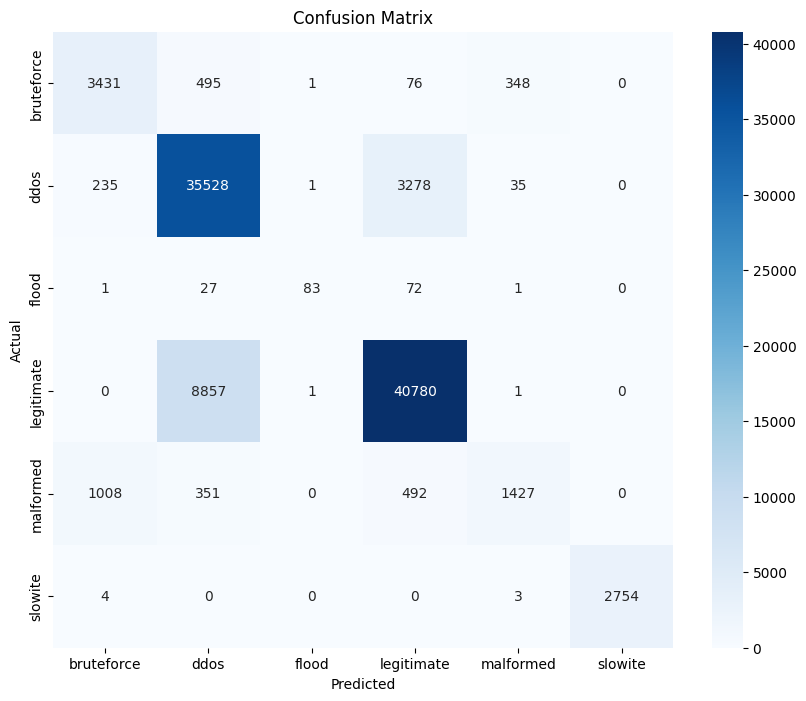

In [17]:
# Wizualizacja macierzy pomyłek
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [18]:
# Krzywa roc dla ddos
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

dftrain_roc = dftrain_roc[dftrain_roc['target'] != 'malformed']
dftrain_roc = dftrain_roc[dftrain_roc['target'] != 'bruteforce']
dftrain_roc = dftrain_roc[dftrain_roc['target'] != 'slowite']
dftrain_roc = dftrain_roc[dftrain_roc['target'] != 'flood']

dftest_roc = dftest_roc[dftest_roc['target'] != 'malformed']
dftest_roc = dftest_roc[dftest_roc['target'] != 'bruteforce']
dftest_roc = dftest_roc[dftest_roc['target'] != 'slowite']
dftest_roc = dftest_roc[dftest_roc['target'] != 'flood']

for column in dftest.columns:
    if dftrain_roc[column].dtype == type(object):
        labelencoder = LabelEncoder()
        dftrain_roc[column] = labelencoder.fit_transform(dftrain_roc[column])

for column in dftest.columns:
    if dftest_roc[column].dtype == type(object):
        labelencoder = LabelEncoder()
        dftest_roc[column] = labelencoder.fit_transform(dftest_roc[column])


y_train_roc = dftrain_roc['target']
X_train_roc = dftrain_roc.drop('target', axis = 'columns')

y_test_roc = dftest_roc['target']
X_test_roc = dftest_roc.drop('target', axis = 'columns')



knn = KNeighborsClassifier(n_neighbors = optimal_k)
knn.fit(X_train_roc, y_train_roc)

y_scores = knn.predict_proba(X_test_roc)
y_pred_roc = knn.predict(X_test_roc)
y_pred = knn.predict(X_test)


In [20]:
# Obliczanie punktów krzywej ROC
fpr, tpr, thresholds = roc_curve(y_test_roc, y_pred_roc)

# Obliczanie obszaru pod krzywą ROC (AUC)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for a specific class
plt.figure(figsize=(14,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

ValueError: multiclass format is not supported